<p style="font-size:30px">✨ Projeto Sprint 3 </p>

# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

In [1]:
# Carregando todas as bibliotecas
import pandas as pd # Apartir dessa biblioteca que vamos manipular e análisar nossa amostra de dados
import numpy as np # Utilizaremos algumas funções matemáticas dessa biblioteca
import matplotlib.pyplot as plt # Essa biblioteca será útil para criação de gráficos
import seaborn as sns

### Carregue dados

In [2]:
# Carregando arquivo com os dados em um DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')


### Explore os dados iniciais

**O conjunto de dados contém os seguintes campos:**
- `price` = Preço;
- `model_year` = Ano do modelo;
- `model` = Modelo do veículo;
- `condition` = Estado de condição;
- `cylinders` = Quantidade de cilindros;
- `fuel` = Gasolina, diesel, etc;
- `odometer` = A quilometragem do veículo quando a propaganda foi publicada; 
- `transmission` = Transmissão;
- `paint_color` = Cor do veículo;
- `is_4wd` = Se o veículo é 4 por 4 (tipo Booleano);
- `date_posted` = A data que a propaganda foi publicada;
- `days_listed` = Quantidade de dias desde a publicação até a retirada.

**Agora utilizaremos as funções: info(), head() e describe() para explorar e nos familiarizar ainda mais com os dados que estão no dataframe df.**

In [3]:
# Informações gerais/resumidas sobre o DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimindo uma amostragem dos dados
df.head(15)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [5]:
# Overview apenas das colunas númericas
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
# Utilizando a função isna() em conjunto com sum() para obter as informações dos dados com valores ausentes
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conhecendo os Dados das Colunas do Dataframe

Agora iremos analisar os valores das colunas individualmente.

Investigando inicialmente as <u>váriaveis categóricas</u>:

<br>

<div style="background-color:#ADD8E6">
     <b>Lembrando:</b> Variáveis categóricas são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos.
</div>

- `model` = Modelo do veículo

In [7]:
df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

- `condition` = Estado de condição 

In [8]:
df['condition'].value_counts(dropna = False)

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

- `cylinders` = Quantidade de cilindros

In [9]:
df['cylinders'].value_counts(dropna = False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

- `fuel` = Gasolina, diesel, etc

In [10]:
df['fuel'].value_counts(dropna = False)

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

- `transmission` = Transmissão

In [11]:
df['transmission'].value_counts(dropna = False)

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

- `paint_color` = Cor do veículo

In [12]:
df['paint_color'].value_counts(dropna = False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

- `is_4wd` = Se o veículo é 4 por 4 (tipo Booleano)

In [13]:
df['is_4wd'].value_counts(dropna = False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

Agora vamos analisar as <u>váriaveis quantitativas</u>:

<br>

<div style="background-color:#ADD8E6">
     <b>Lembrando:</b> Variáveis quantitativas são aquelas em que as possíveis realizações (resultados) são números resultantes de uma contagem ou mensuração.
</div>

- `price` = Preço

In [14]:
df['price'].quantile(np.linspace(0, 1, 11))

0.0         1.0
0.1      2995.0
0.2      4500.0
0.3      5900.0
0.4      7450.0
0.5      9000.0
0.6     11900.0
0.7     14977.0
0.8     18950.0
0.9     25200.0
1.0    375000.0
Name: price, dtype: float64

- `model_year` = Ano do modelo

In [15]:
df['model_year'].quantile(np.linspace(0, 1, 11))

0.0    1908.0
0.1    2002.0
0.2    2005.0
0.3    2007.0
0.4    2009.0
0.5    2011.0
0.6    2012.0
0.7    2014.0
0.8    2015.0
0.9    2017.0
1.0    2019.0
Name: model_year, dtype: float64

- `odometer` = A quilometragem do veículo quando a propaganda foi publicada

In [16]:
df['odometer'].quantile(np.linspace(0, 1, 11))

0.0         0.0
0.1     31860.8
0.2     58143.2
0.3     80000.0
0.4     97896.2
0.5    113000.0
0.6    129000.0
0.7    145624.0
0.8    166000.0
0.9    196000.0
1.0    990000.0
Name: odometer, dtype: float64

- `date_posted` = A data que a propaganda foi publicada

In [17]:
df['date_posted'].value_counts(dropna=False)

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2018-06-08    117
2019-01-11    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

- `days_listed` = Quantidade de dias desde a publicação até a retirada

In [18]:
df['days_listed'].quantile(np.linspace(0, 1, 11))

0.0      0.0
0.1     10.0
0.2     16.0
0.3     22.0
0.4     27.0
0.5     33.0
0.6     40.0
0.7     48.0
0.8     59.0
0.9     77.0
1.0    271.0
Name: days_listed, dtype: float64

### Conclusões e próximos passos

**Ao realizar a exploração de dados no dataframe a cima, foi possível identificar os seguintes problemas que precisam ser tratados:**


**1º)** As colunas 'model_year', 'cylinders', 'odometer', 'paint_color' e 'is_4wd' possuem `valores nulos`;

**2º)** As seguintes colunas precisam ter seus `tipos de dados alterados`:

- 'model_year' e 'days_listed' = Precisam ser integer, pois a quantidade de um ano e dias é um número inteiro;
- 'is_4wd' = Se trata de valores buleanos;
- 'date_posted' = Precisa que o tipo de dado seja convertido para timestamp, por se tratar de data.

## Cuide dos valores ausentes (se houver algum)

In [19]:
# Relambrando as colunas que possuem valores ausentes
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Vamos começar a tratar a coluna <u>"is_4wd"</u>, onde se o resultado for igual a 1 o carro é 4X4 e se caso o resultado for 0, o carro tem outro tipo de tração.

In [20]:
df['is_4wd'].unique()

array([ 1., nan])

É possível verificar que não há nenhum valor 0, o que indica que há uma grande possibilidade dos valores NaN serem 0.

Sabemos que a tração 4x4 é mais comum em camionetes, então vamos dar uma olhada nos modelos dos carros que tem valores faltantes na coluna "is_4wd".

In [21]:
df[df['is_4wd'] != 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

Identificado que a grande maioria dos modelos não são de camionetes, indicando que esses valores eram pra ser igual a 0, então precisamos fazer esse ajuste:

In [22]:
# Substituindo os valores NaN da coluna 'is_4wd'
df['is_4wd'] = df['is_4wd'].fillna(0)

In [23]:
# Validando o nosso ajuste
df['is_4wd'].unique()

array([1., 0.])

Agora vamos verificar a variável categórica "paint_color" e ajustar seus valores faltantes.

In [24]:
# Exibir o dataframe somente onde a cor do veículo não foi informada, e validar se há alguma relação com outra tabela
df[df['paint_color'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


In [25]:
df[df['paint_color'].isnull()].describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,9267.000000,8615.000000,8317.000000,7812.000000,9267.000000,9267.000000
mean,12170.749541,2009.818920,6.129133,114558.746800,0.499622,39.376821
std,9599.841183,6.230719,1.664115,63791.557735,0.500027,28.085425
min,1.000000,1958.000000,3.000000,0.000000,0.000000,0.000000
25%,5197.000000,2006.000000,4.000000,69755.500000,0.000000,19.000000
50%,9400.000000,2011.000000,6.000000,112000.000000,0.000000,33.000000
75%,16993.000000,2014.000000,8.000000,153943.750000,1.000000,53.000000
max,189000.000000,2019.000000,10.000000,811956.000000,1.000000,271.000000


Não foi possível identificar nenhuma relação relevante entre os valores faltantes e as outras colunas. Vamos verificar a quantidade da amostra que seria comprometida, se excluissimos os valores NaN.

In [26]:
# Calculando a porcentagem da amostra que esta comprometida por valores faltantes na coluna "paint_color"
(len(df[df['paint_color'].isnull()].index) / len(df.index))*100

17.985443959243085

17% da nossa amostra é muita coisa pra ser apagada e como verificamos que a cor do veículo não tem relação com as outras colunas, iremos substituiir os valores NaN por "undefined"

In [27]:
# Substituindo os valores NaN da coluna 'is_4wd'
df['paint_color'] = df['paint_color'].fillna("undefined")

In [28]:
# Validando a alteração realizada
df['paint_color'].unique()

array(['undefined', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [29]:
# Validando a alteração realizada
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Vamos validar os valores faltantes da coluna quantitativa "odometer":

In [30]:
# Calculando a porcentagem da amostra que esta comprometida por valores faltantes na coluna "odometer"
(len(df[df['odometer'].isnull()].index) / len(df.index))*100

15.316836487142163

15% é também uma grande porcentagem da nossa amostra pra ser excluída, então temos que examinar se iremos substituir esses valores com a média ou com a mediana.

In [31]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

Com o método describe foi possível identificar que a média e a mediana possuem valores bem parecidos, indicando que a nossa amostra não possui muitos valores atípicos. Então os valores NaN da nossa coluna "odometer" serão substituidos pelo valor médio da mesma.

In [32]:
df['odometer'] = df['odometer'].fillna(113000)

In [33]:
# Validando a alteração realizada
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Vamos verificar a coluna "cylinders":

In [34]:
# Calculando a porcentagem da amostra que esta comprometida por valores faltantes na coluna "odometer"
(len(df[df['cylinders'].isnull()].index) / len(df.index))*100

10.208636584182436

In [35]:
# Revendo a quantidade de valores
df["cylinders"].value_counts(dropna = False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [36]:
# Exibir o dataframe somente onde não é informado a quantidade de cilindro, e validar se há alguma relação com outra tabela
df[df['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,undefined,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,undefined,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,undefined,0.0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


Identificado que os valores NaN da coluna "cylinders" não tem nenhuma relação com os outros valores. Então será necessário avaliar se será utilizado a média ou a mediana para substitui-los.

In [37]:
df["cylinders"].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Identificado que a amostra não possui nenhum valor atípico, pois a média tem um valor muito próximo da mediana. Então para substituir os valores faltantes, vamos usar a média.

In [38]:
# Substituindo os valores pela média
df['cylinders'] = df['cylinders'].fillna(6)

In [39]:
# Validando a alteração realizada
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

E por último vamos analisar os valores ausentes da coluna quantitativa "model_year":

In [40]:
# Calculando a porcentagem da amostra que esta comprometida por valores faltantes na coluna "model_year"
(len(df[df['model_year'].isnull()].index) / len(df.index))*100

7.023774866569626

Cerca de 7% da nossa amostra será comprometida se apagarmos os valores ausentes da coluna "model_year". Então não vale apena apaga-los e temos que achar uma solução alternativa para substituir esses valores.

In [41]:
# Exibir o dataframe somente onde não é informado a quantidade de cilindro, e validar se há alguma relação com outra tabela
df[df['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,6.0,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [42]:
df[df['model_year'].isnull()].describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,3619.000000,0.0,3619.000000,3619.000000,3619.000000,3619.000000
mean,11761.815142,NaN,6.100304,116600.969052,0.499586,39.421387
std,9465.731785,NaN,1.585642,58414.995569,0.500069,28.238297
min,1.000000,NaN,3.000000,0.000000,0.000000,0.000000
25%,4995.000000,NaN,4.000000,82268.500000,0.000000,19.000000
50%,8980.000000,NaN,6.000000,113000.000000,0.000000,33.000000
75%,15995.000000,NaN,8.000000,148000.000000,1.000000,54.000000
max,109999.000000,NaN,10.000000,415371.000000,1.000000,256.000000


In [43]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,51525.000000,51525.000000,51525.000000,51525.00000
mean,12132.464920,2009.750470,6.112450,115162.352179,0.496303,39.55476
std,10040.803015,6.282065,1.573784,59909.264385,0.499991,28.20427
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000
25%,5000.000000,2006.000000,4.000000,79181.000000,0.000000,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.00000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000


Apartir do nosso dataframe e com o método describe que utilizamos a cima, não foi possível identificar nenhuma relação dos valores faltantes com as outras colunas e nossa amostra não possui valores atípicos. Isso significa que utilizaremos a média da coluna "model_year" para substituir os NaN.

In [44]:
# Substituindo os valores pela média
df['model_year'] = df['model_year'].fillna(2011)

In [45]:
# Validando a alteração realizada
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Agora nosso dataframe não possui mais nenhum valor ausente para atrapalhar nossas analises!

## Corrija os tipos de dados

In [46]:
# Vamos relembrar novamente as informações que temos até aqui no nosso dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Já ajustamos todos os valores ausentes na secção anterior e agora nessa etapa iremos ajustar os tipos de dados da seguintes colunas que estão divergêntes:
- 'model_year'=  Precisa ser integer, pois a quantidade de um ano é um número inteiro;
- 'is_4wd' = Se trata de valores buleanos e está sendo representado como float;
- 'date_posted' = Precisa que o tipo de dado seja convertido para timestamp, por se tratar de data.


In [47]:
# Corvertendo o valor 'model_year' para integer:
df['model_year'] = df['model_year'].astype('int')

In [48]:
# Corvertendo o valor 'is_4wd' para bool:
df['is_4wd'] = df['is_4wd'].astype('bool')

In [49]:
# Corvertendo o valor 'date_posted' para datetime64:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


## Enriqueça os dados

In [51]:
# Adicione valores data/hora para quando a propaganda estiver colocada

df['weekday'] = pd.DatetimeIndex(df['date_posted']).weekday #Segunda=0, Domingo=6.
df['weekday'] = df['weekday'].replace([0, 1, 2, 3, 4, 5, 6],['monday', 'tuesday','wednesday','thursday','friday','saturday','sunday'])

df['month'] = pd.DatetimeIndex(df['date_posted']).month
df['month'] = df['month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],['january', 'february','march','april','may','june','july', 'august', 'september', 'october', 'november', 'december'])

df['year'] = pd.DatetimeIndex(df['date_posted']).year

df[['weekday', 'month', 'year']]

,weekday,month,year
0,saturday,june,2018
1,friday,october,2018
2,thursday,february,2019
3,friday,march,2019
4,tuesday,april,2019
...,...,...,...
51520,wednesday,october,2018
51521,wednesday,november,2018
51522,thursday,november,2018
51523,monday,july,2018


Adicionado novas tabelas para facilitar a analise dos dados:

In [52]:
# Adicionando a idade do veículo quando a propaganda for colocada
df['vehicle_age'] =  df['year'] - df['model_year']

In [53]:
# Adicionando a quilometragem média por ano
df['average_mileage'] = df['odometer'] / df['vehicle_age']


In [54]:
# Mudando os valores da coluna condition para uma escala númerica
df['condition'] = df['condition'].replace(
    ['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
    [2, 4, 1, 3, 0, 5]
)

Novos valores da coluna "condition" ficaram assim:
* novo = 5
* como novo = 4
* excellente = 3
* bom = 2
* razoável = 1
* sucata = 0

## Verifique os dados limpos

Já que os dados estão prontos para a análise, vamos dar apenas uma rápida olhada neles, validando as alterações realizada.

In [55]:
# imprimindo as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  int64         
 1   model_year       51525 non-null  int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  int64         
 4   cylinders        51525 non-null  float64       
 5   fuel             51525 non-null  object        
 6   odometer         51525 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  weekday          51525 non-null  object        
 14  month            51525 non-null  objec

In [56]:
# imprima uma amostragem dos dados
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,vehicle_age,average_mileage
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,undefined,True,2018-06-23,19,saturday,june,2018,7,20714.285714
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,friday,october,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,thursday,february,2019,6,18333.333333
3,1500,2003,ford f-150,1,8.0,gas,113000.0,automatic,pickup,undefined,False,2019-03-22,9,friday,march,2019,16,7062.500000
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,tuesday,april,2019,2,40451.500000


## Estude os parâmetros fundamentais

Os parâmetros são:
- Preço (price);
- A idade do veículo quando a propaganda foi colocada (vehicle_age);
- Quilometragem (odometer);
- Número de cilindros (cylinders);
- Condição (condition).

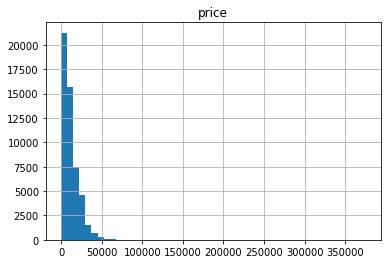

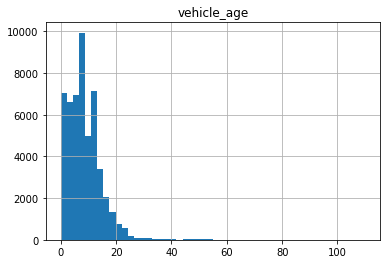

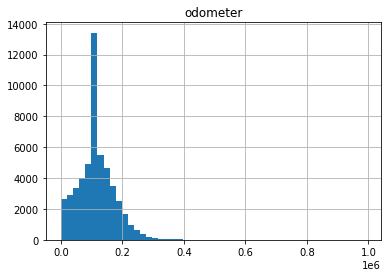

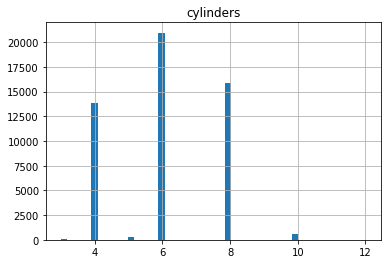

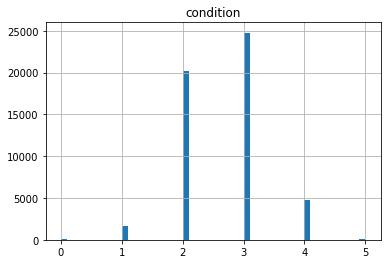

In [57]:
parametros = ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']

for item in parametros:
    df.hist(item, bins=50)

## Estude e cuide dos valores ausentes

Foi possível identificar alguns valores atípicos nos histogramas a cima, então iremos para deixarmos nossa amostra o mais fiel possível será necessário filtrar esses valores e para isso iremos definir os limites inferior/superior para intervalos normais de valores e criar um novo dataframe.

Colunas que possuem valores atípicos: 
* "price" =  possui alguns veiculos com valores baixos fora da curva
* "vehicle_age" = contém um valor alto, fora da curva.

In [58]:
(df['price'] == 1).sum()

798

In [59]:
# Determine o limite inferior para valores atípicos
min_price = 1000

In [60]:
# Determine o limite superior para valores atípicos
max_vehicle_age = 25

In [61]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
df_filter = df.query('price >= @min_price and vehicle_age <= @max_vehicle_age') 


## Estude os parâmetros fundamentais sem valores atípicos

Usando os dados filtrados iremos gerar novos gráficos e validar os seus valores.

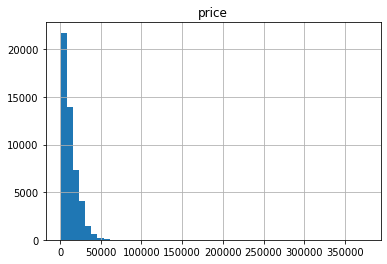

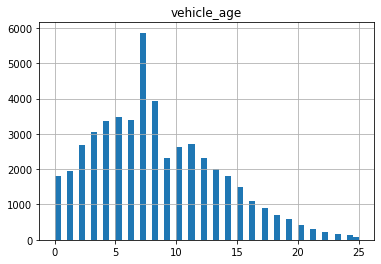

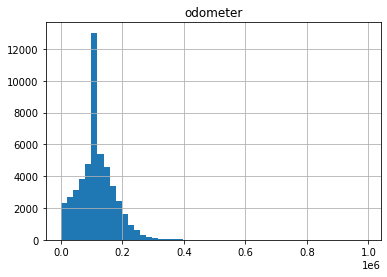

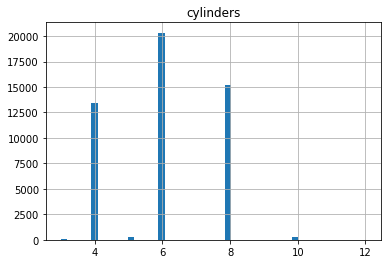

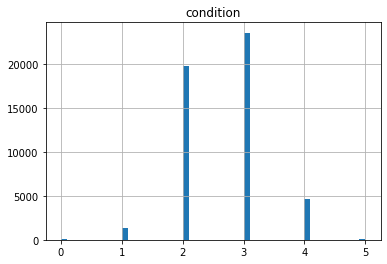

In [62]:
for item in parametros:
    df_filter.hist(item, bins=50)

É possível concluir que todos os valores atípicos foram retirados dessas colunas e podemos seguir com as nossas análises.

## Tempo de vida das propagandas

In [63]:
# Validando as novas informações do dataframe que está com filtros
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49508 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            49508 non-null  int64         
 1   model_year       49508 non-null  int64         
 2   model            49508 non-null  object        
 3   condition        49508 non-null  int64         
 4   cylinders        49508 non-null  float64       
 5   fuel             49508 non-null  object        
 6   odometer         49508 non-null  float64       
 7   transmission     49508 non-null  object        
 8   type             49508 non-null  object        
 9   paint_color      49508 non-null  object        
 10  is_4wd           49508 non-null  bool          
 11  date_posted      49508 non-null  datetime64[ns]
 12  days_listed      49508 non-null  int64         
 13  weekday          49508 non-null  object        
 14  month            49508 non-null  objec

In [64]:
# Coletando as informações gerais da coluna
df_filter['days_listed'].describe()

count    49508.000000
mean        39.549285
std         28.209160
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

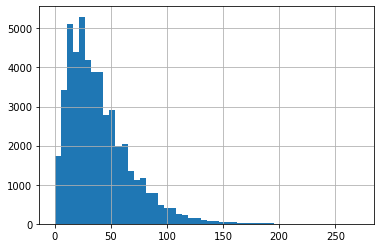

In [65]:
# Verificando os dados visualmente apartir do histograma
df_filter['days_listed'].hist(bins = 50);

In [66]:
# Vamos pegar dois pedaços da amostra e identificar qual fator influênca o carro vendar mais
days_listed_slow = 90 
days_listed_fast = 7

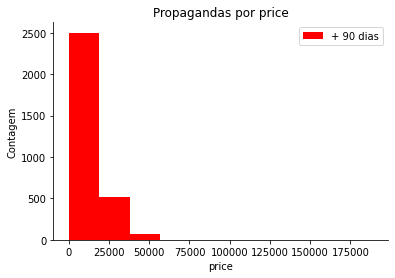

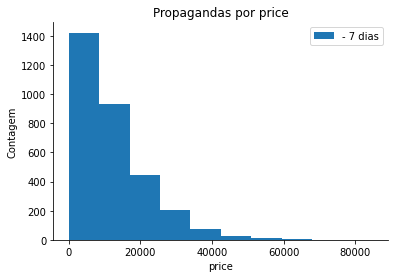

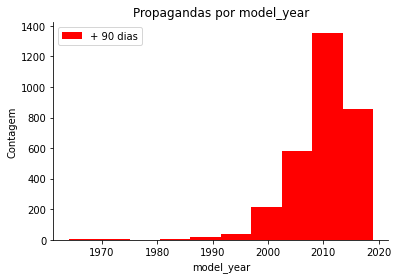

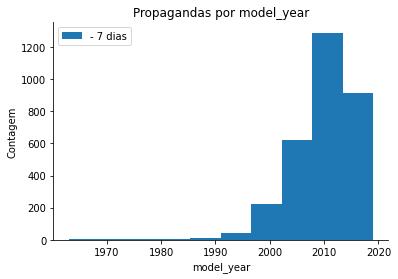

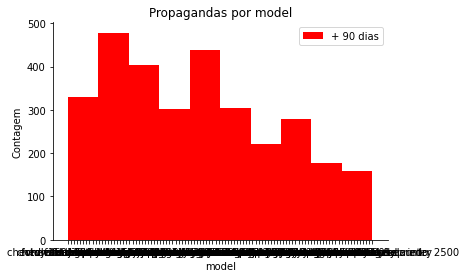

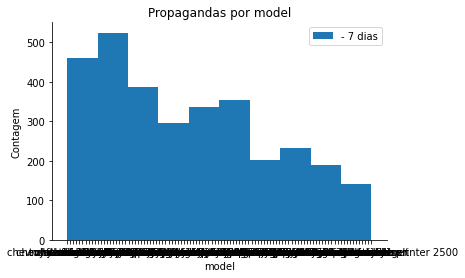

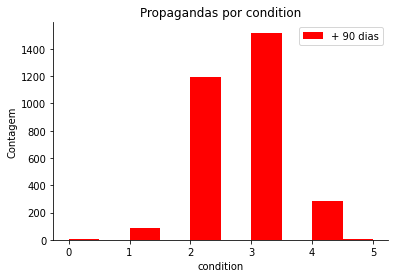

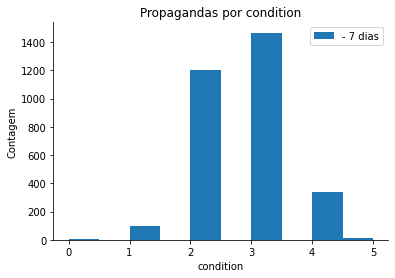

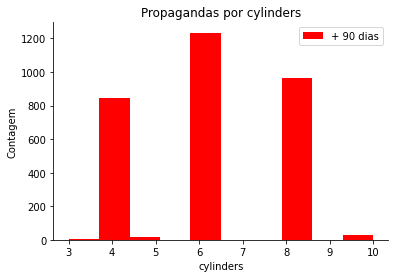

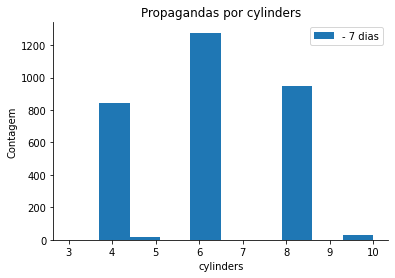

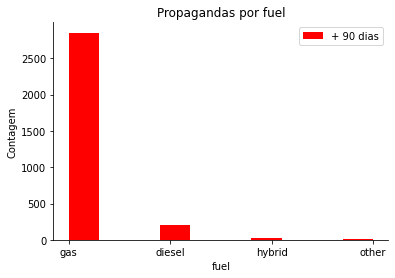

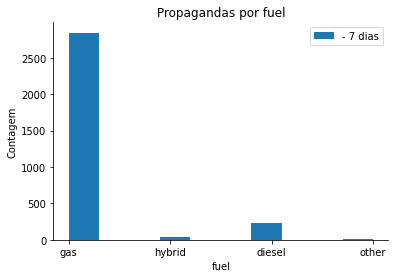

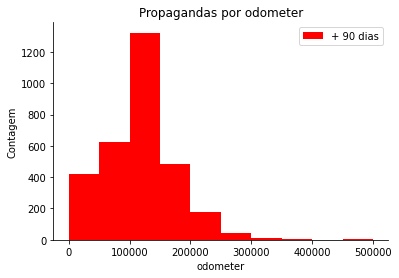

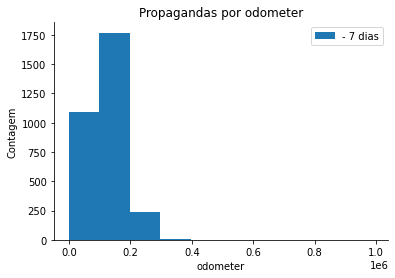

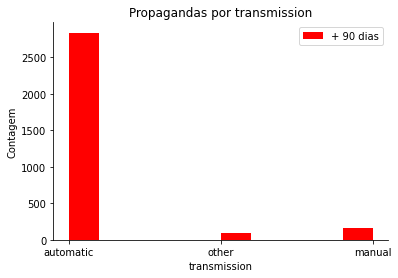

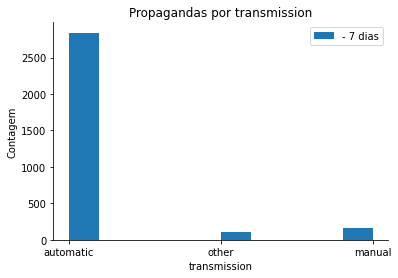

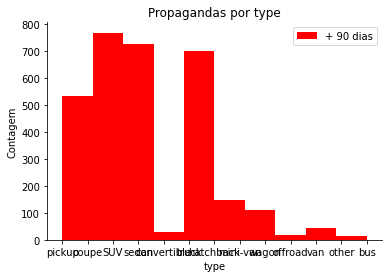

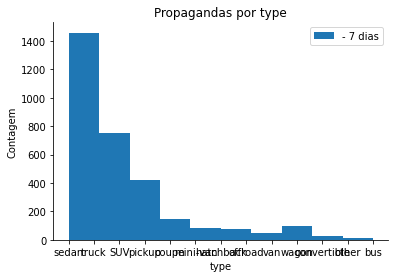

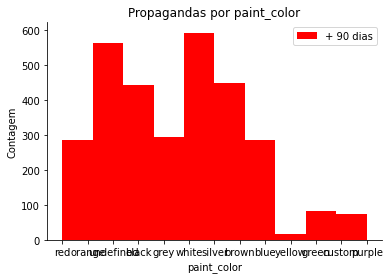

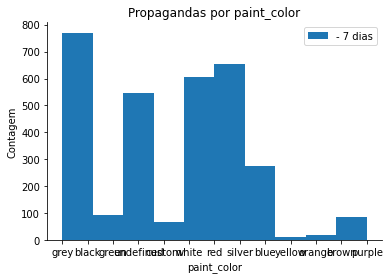

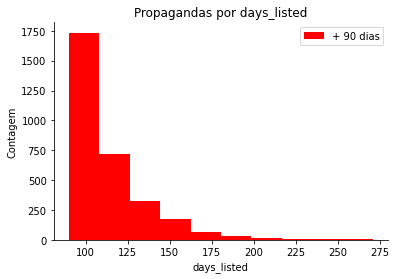

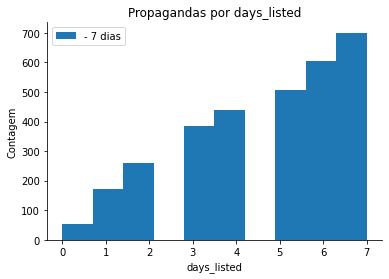

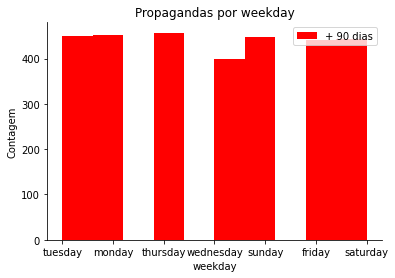

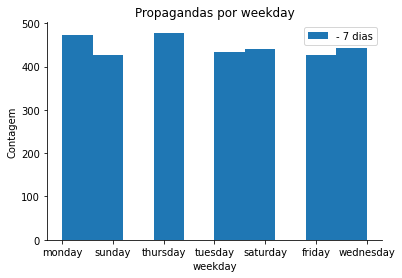

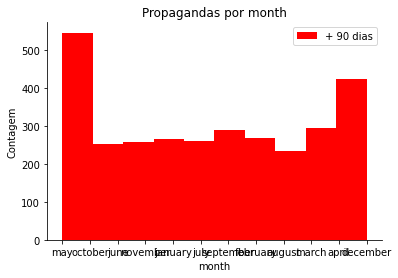

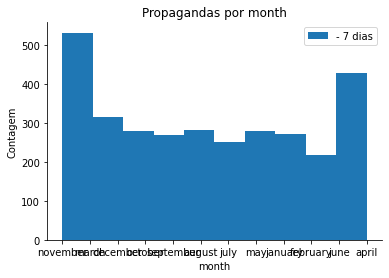

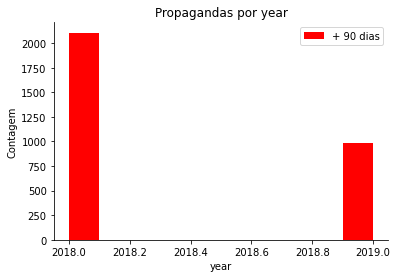

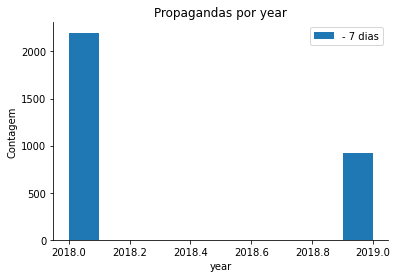

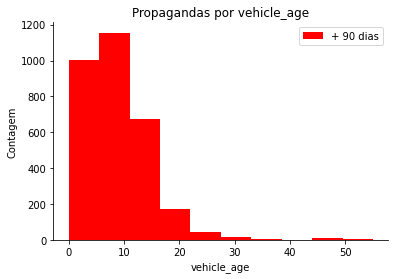

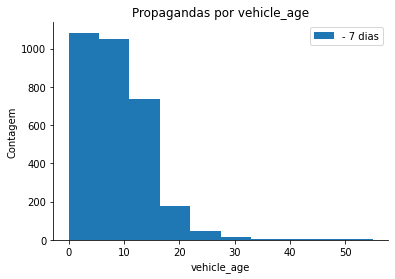

<Figure size 432x288 with 0 Axes>

In [67]:
# Validando a diferença entre propagandas que foram retiradas rapidamente com as que que ficaram mais dias
for i, col in enumerate(df_filter.columns):
    if col == "date_posted" or col == "is_4wd" or col == "average_mileage":
        continue
    else:
        ax = plt.subplot(111)
        df.query("days_listed >= @days_listed_slow")[col].hist(ax = ax, label = '+ 90 dias', color = 'red', grid=False)
        plt.legend()
        plt.title(f'Propagandas por {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        sns.despine()
        plt.show()
        ax = plt.subplot(111)
        df.query("days_listed <= @days_listed_fast")[col].hist(ax = ax, label = '- 7 dias', grid=False)
        plt.legend()
        plt.title(f'Propagandas por {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        sns.despine()
        plt.show()

plt.tight_layout();

Foi possível identificar na nossa análise que a vida útil de uma propaganda geralmente fica em torno de trinta dias e que essa quantidade de dias tem uma correlação com as seguintes colunas: "odometer", "type" e "month" , ou seja, dependendo dessas valores a quantidade de dias que essa propaganda vai ficar disponível irá variar.

## Média de preços por cada tipo de veículo

In [68]:
# Validando o preço médio de cada veículo e a quantidade de propaganda de cada um

df_filter.groupby('type').agg(
{'price': ['count', 'mean']} 
)

price              
             count          mean
type                            
SUV          11960  11517.837542
bus             23  17445.913043
convertible    360  14555.702778
coupe         2030  14926.206404
hatchback      992   7004.265121
mini-van      1148   8278.899826
offroad        192  15453.317708
other          242  10830.438017
pickup        6839  16315.405907
sedan        11699   7203.802889
truck        11911  17308.793720
van            603  11044.923715
wagon         1509   9238.546057

- SUV e Truck

<AxesSubplot:xlabel='type'>

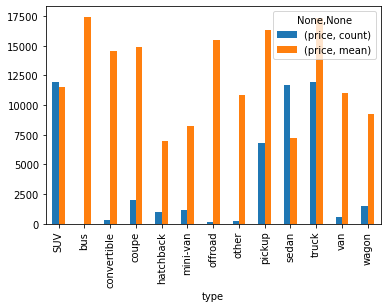

In [69]:
# Plotando um gráfico com as informações a cima 
df_filter.groupby('type').agg(
{'price': ['count', 'mean']} 
).plot(kind='bar') 

Foi possível identificar em nossa amostra que que os veículos que tem mais propagandas são SUV e TRUCK.

## Fatores de preço

<AxesSubplot:title={'center':'price'}, xlabel='[transmission]'>

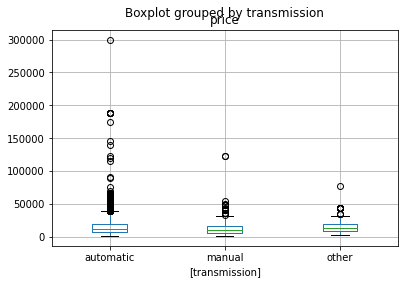

In [70]:
# preço X tipo de transmissão

(df_filter
     .query('type=="truck" or type=="SUV"')
     .boxplot(['price'], by = ['transmission'])
) 



<AxesSubplot:xlabel='price', ylabel='transmission'>

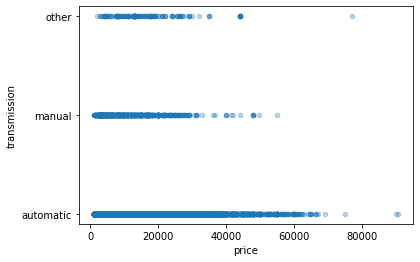

In [71]:
# preço X tipo de transmissão
(df_filter
     .query('price < 100000')
     .query('type=="truck" or type=="SUV"')
     .plot(x='price', y='transmission', kind='scatter', alpha=0.3) 
) 

<AxesSubplot:title={'center':'price'}, xlabel='[paint_color]'>

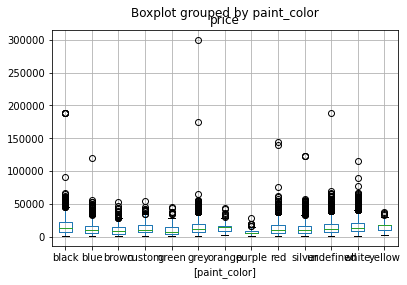

In [72]:
# preço X cor
(df_filter
     .query('type=="truck" or type=="SUV"')
     .boxplot(['price'], by = ['paint_color'])
) 


<AxesSubplot:xlabel='price', ylabel='paint_color'>

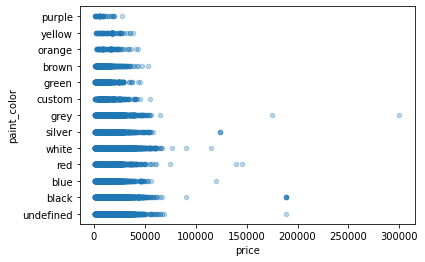

In [73]:
# preço X cor
(df_filter
     .query('type=="truck" or type=="SUV"')
     .plot(x='price', y='paint_color', kind='scatter', alpha=0.3) 
) 

<AxesSubplot:xlabel='price', ylabel='model_year'>

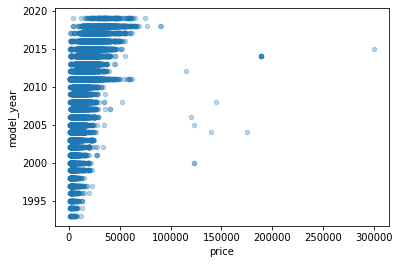

In [74]:
# preço X idade
(df_filter
     .query('type=="truck" or type=="SUV"')
     .plot(x='price', y='model_year', kind='scatter', alpha=0.3) 
) 

<AxesSubplot:xlabel='price', ylabel='average_mileage'>

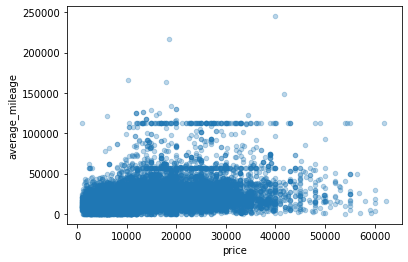

In [75]:
# preço X quilometragem
(df_filter
     .query('price < 100000')
     .query('type=="truck" or type=="SUV"')
     .plot(x='price', y='average_mileage', kind='scatter', alpha=0.3) 
) 

<AxesSubplot:xlabel='price', ylabel='condition'>

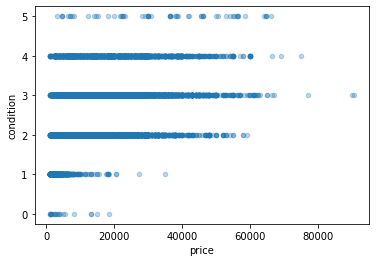

In [76]:
# preço X condição
(df_filter
     .query('price < 100000')
     .query('type=="truck" or type=="SUV"')
     .plot(x='price', y='condition', kind='scatter', alpha=0.3) 
) 

## Conclusão geral

Depois de ter realizado um pré-processamento dos nossos dados e ter realizado uma análise explorarória em nossa amostra final, foi possível identificar pelos gráficos da etapa acima que as seguintes caracteristicas impactam no valor do veículo:
* Condição (Quando melhor a condição do veículo, o preço tende a ser maior)
* Ano do carro (Quando mais novo o veículo, mais caro ele é)
* Transmissão (Foi possível identificar que quando a transmissão era automática, os preços dos veículos são maiores)


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. Você respondeu tudo corretamente. Deixei algumas pequenas sugestões de melhoria (estão mais associadas à escolha de gráficos para visualização).

Desejo sucesso na jornada.    
</div>